In [ ]:
!pip install yfinance
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importando y leyendo los datos

In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score, plot_roc_curve 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC

In [ ]:
nasdaq = yf.Ticker("^IXIC")
nasdaq = nasdaq.history(period='max')
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0,0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0,0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0,0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,10516.940430,10587.959961,10428.910156,10564.519531,4456690000,0,0
2022-11-08 00:00:00-05:00,10611.530273,10745.639648,10472.730469,10616.200195,5134500000,0,0
2022-11-09 00:00:00-05:00,10528.450195,10564.969727,10344.009766,10353.169922,4977460000,0,0


**Visualizando y limpiando los datos**

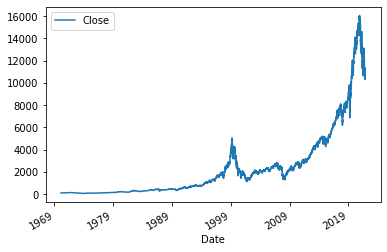

In [ ]:
nasdaq.plot.line(y='Close', use_index=True)

In [ ]:
del nasdaq['Dividends']
del nasdaq['Stock Splits']

# Añadiendo el etiquetado para el modelo

In [ ]:
nasdaq['Tomorrow'] = nasdaq['Close'].shift(-1)
nasdaq

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003
...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,10516.940430,10587.959961,10428.910156,10564.519531,4456690000,10616.200195
2022-11-08 00:00:00-05:00,10611.530273,10745.639648,10472.730469,10616.200195,5134500000,10353.169922
2022-11-09 00:00:00-05:00,10528.450195,10564.969727,10344.009766,10353.169922,4977460000,11114.150391


In [ ]:
nasdaq['Value'] = (nasdaq['Tomorrow'] > nasdaq['Close']).astype(int)
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Value
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996,1
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997,1
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003,1
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,10516.940430,10587.959961,10428.910156,10564.519531,4456690000,10616.200195,1
2022-11-08 00:00:00-05:00,10611.530273,10745.639648,10472.730469,10616.200195,5134500000,10353.169922,0
2022-11-09 00:00:00-05:00,10528.450195,10564.969727,10344.009766,10353.169922,4977460000,11114.150391,1


# Dividimos y preparamos nuestros datos para aplicar los modelos

In [ ]:
# Dividimos nuestros datos
train = nasdaq.iloc[:-2600] # Aproximadamente el 80% de los datos
test = nasdaq.iloc[-2600:-60] # El restante para test
test_final = nasdaq.iloc[-60:] # Sacamos una pequeña parte para probar el modelo final

Creamos una función que nos ayude a dividir la data

In [ ]:
def split(dataset):
    X = dataset.drop(columns=['Value'], axis=1)
    y = dataset['Value']
    return X, y

In [ ]:
X_train, y_train = split(train)
X_test, y_test = split(test)
X_test_final, y_test_final = split(test_final)

Como no contamos con datos mixtos (DATASET CUSTOMIZADO). Realizamos una transformación simple. Asi que agregamos la funcion MinMaxScaler, para trabajar con columnas numéricas. Además utilizamos pipeline para aplicar dicha serie de transformaciones seguidas por la aplicación de un estimador.

In [ ]:
# Configurar paso de escala
cols = nasdaq.columns[:-1].tolist()
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])  
# el paso de escala en un transformador de columna
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, cols)])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Open', 'High', 'Low', 'Close', 'Volume',
                                  'Tomorrow'])])

# Modelamiento 
Para poder evaluar nuestros modelos vamos a usar las siguientes metricas:

*   Reporte de clasificación: Es el visualizador de  resultados, muestra las puntuaciones de las metricas de la matriz de confusión precision, recall, F1, and support scores para cada uno de los modelos

*   Matrix de confusión: Es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

Para interpretar correctamente las predicciones realizadas por modelos de clasificación binarios (dos clases) utilizaremos las curvas ROC.

*   Curva ROC: Muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) del modelo. TPR describe la tasa a la que el clasificador predice como “positivo” a las observaciones que son “positivas”.

Métrica ROC_AUC (Area Under Curve): Que tan bien funciona el modelo

Esta área posee un valor comprendido entre 0,5 y 1, donde 1 representa un valor diagnóstico perfecto y 0,5 es una prueba sin capacidad discriminatoria diagnóstic

#TENER EN CUENTA: 

(ratio de falsos positivos (eje x) con el ratio de falsos negativos (eje y).)
Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos
Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos

# Metricas de Clasificación (Matriz de confusión)

*   Exactitud: Se refiere a lo cerca que está el resultado de una medición del valor verdadero. (VP+VN)/(VP+FP+FN+VN)

*   Precisión: La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.

*   sensibilidad: Que tan sensible es el clasificador para detectar instancias positivas. Esto también se conoce como la tasa verdadera positiva.

*   F1: Se utiliza para combinar las medidas de precision y recall (Exactitud) en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias 
soluciones.





Creamos una función de evaluación donde tendremos las metricas para analizar el modelo

In [ ]:
def evaluacion(model, X_train, y_train, X_test, y_test):
    # Vector de precision
    vec_train = []
    vec_test = []
    # Prediccion 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metricas Train
    print("Train")
    print(f"accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    vec_train.append(round(accuracy_score(y_train, y_train_pred),4))

    # Metricas Test
    print("Test")
    print(f"accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    vec_test.append(round(accuracy_score(y_test, y_test_pred), 4))
    print("\n")

    # Classification Report
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Greens, values_format = '.0f')
   
    # Plot ROC-curve
    plot_roc_curve(model, X_test, y_test)
    plt.show()
    return vec_train, vec_test

## Usamos el modelo de **KNN**

KNN toma un punto, calcula las distancias entre ese punto y cada uno de los puntos del conjunto de entrenamiento y encuentra los k vecinos más cercanos para examinar la etiqueta

Primero lo que hacemos es la tranformación de los datos para cada uno de los clasificadores. En este caso utilizamos KNN, Ramdon Forest, Bagging, Adaboost, SVC.

Luego hacemos la asignación de los datos para el entrenamiento y la prueba con el metodo fit para cada uno de los modelos.  

Finalmente hacemos la evaluación que lo que busca es validar si los datos de entrenamiento y de prueba se adaptan a los modelos utilizado 






Train
accuracy: 0.8489
Test
accuracy: 0.4976


              precision    recall  f1-score   support

           0       0.46      0.84      0.60      1118
           1       0.65      0.23      0.34      1422

    accuracy                           0.50      2540
   macro avg       0.55      0.53      0.47      2540
weighted avg       0.56      0.50      0.45      2540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


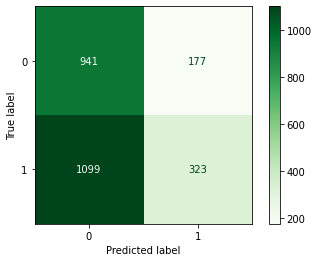

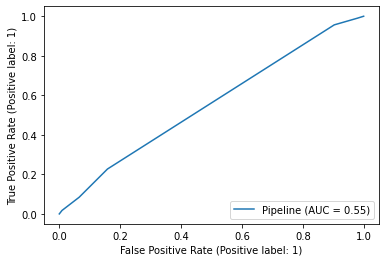

([0.8489], [0.4976])

In [ ]:
knn_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', KNeighborsClassifier())])

knn_clf.fit(X_train, y_train)

knn_result = evaluacion(knn_clf, X_train, y_train, X_test, y_test)
knn_result

## Usamos el modelo de Random Forest



* Pros: maximiza la información en cada paso
* Contras: los árboles entrenados en el mismo conjunto de datos generarán exactamente la misma respuesta (falta de aleatoriedad)

Train
accuracy: 1.0000
Test
accuracy: 0.4988


              precision    recall  f1-score   support

           0       0.46      0.86      0.60      1118
           1       0.66      0.21      0.32      1422

    accuracy                           0.50      2540
   macro avg       0.56      0.54      0.46      2540
weighted avg       0.57      0.50      0.45      2540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


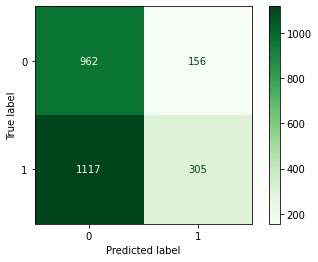

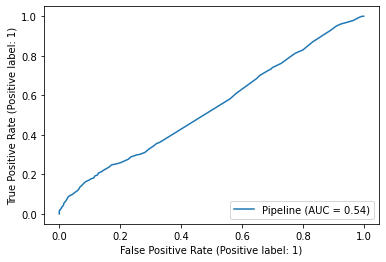

([1.0], [0.4988])

In [ ]:
rf_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(criterion='entropy', random_state=24))])

rf_clf.fit(X_train, y_train)

rf_result = evaluacion(rf_clf, X_train, y_train, X_test, y_test)
rf_result

## Usamos el modelo de Bagging

Similar a RF, pero fomenta la diferencia entre árboles.
* Pros: obtener una parte de los datos mediante muestreo con reemplazo (aumentar la variabilidad)
* Contras: la debilidad potencial afecta a todos los árboles a la vez (la señal falsa puede conducir a una predicción incorrecta)

Train
accuracy: 0.9945
Test
accuracy: 0.5161


              precision    recall  f1-score   support

           0       0.47      0.87      0.61      1118
           1       0.70      0.24      0.36      1422

    accuracy                           0.52      2540
   macro avg       0.59      0.55      0.48      2540
weighted avg       0.60      0.52      0.47      2540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


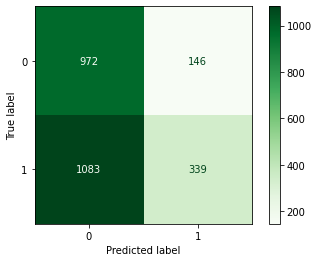

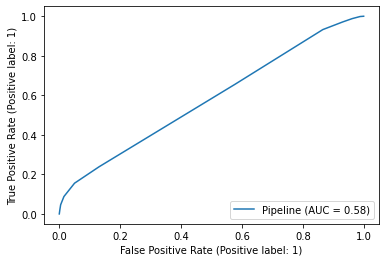

([0.9945], [0.5161])

In [ ]:
bag_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state=24)))])

bag_clf.fit(X_train, y_train)

bag_result = evaluacion(bag_clf, X_train, y_train, X_test, y_test)
bag_result

## Usamos el modelo de Adaboost

Similar a Bagging
* Pros: se reduce el peso de la clasificación correcta y aumenta el peso de la clasificación incorrecta
* Contras: influir continuamente en la distribución de los datos muestreados para capacitar a cada alumno sucesivo

Train
accuracy: 1.0000
Test
accuracy: 0.4921


              precision    recall  f1-score   support

           0       0.46      0.85      0.60      1118
           1       0.64      0.21      0.32      1422

    accuracy                           0.49      2540
   macro avg       0.55      0.53      0.46      2540
weighted avg       0.56      0.49      0.44      2540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


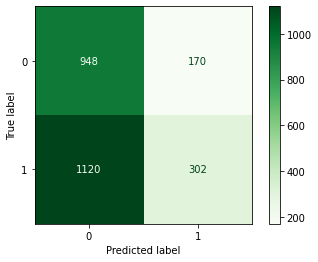

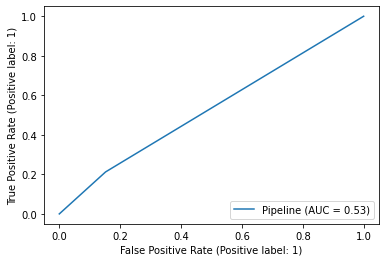

([1.0], [0.4921])

In [ ]:
ada_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', random_state=24)))])

ada_clf.fit(X_train, y_train)

ada_result = evaluacion(ada_clf, X_train, y_train, X_test, y_test)
ada_result

## Usamos el modelo de SVC

Clasificación de vectores de soporte

Train
accuracy: 0.6857
Test
accuracy: 0.8354


              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1118
           1       1.00      0.71      0.83      1422

    accuracy                           0.84      2540
   macro avg       0.86      0.85      0.84      2540
weighted avg       0.88      0.84      0.83      2540



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


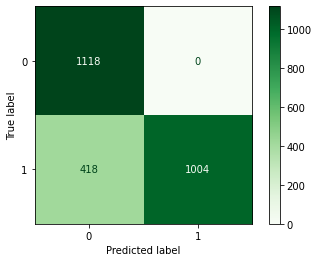

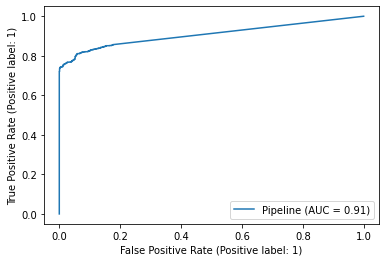

([0.6857], [0.8354])

In [ ]:
svc_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', SVC(kernel='poly', probability=True, random_state=42))])

svc_clf.fit(X_train, y_train)

svc_result = evaluacion(svc_clf, X_train, y_train, X_test, y_test)
svc_result



> Analizando cada uno de los modelos a traves de las metricas nos damos cuenta que el mejor modelo fue el de maquinas de soporte vectorial SVC



# Evaluación del mejor modelo

Despues de utilizar cada uno de los modelos, pasamos a evaluar cual es el mejor. 

Creamos un DataFrame (df) que almacene la probabilidad de predicción y los resultados para cada uno de los modelos 

In [ ]:
X_test_final['Tomorrow'] = X_test_final['Tomorrow'].fillna(0)

In [ ]:
test_result = pd.DataFrame(columns=['true', 'pred', 'uptrend', 'downtrend'])

test_result['true'] = y_test_final
test_result['pred'] = svc_clf.predict(X_test_final)
test_result['downtrend'] = svc_clf.predict_proba(X_test_final)[:, 0]
test_result['uptrend'] = svc_clf.predict_proba(X_test_final)[:, 1]

test_result

,true,pred,uptrend,downtrend
Date,,,,
2022-08-19 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01
2022-08-22 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01
2022-08-23 00:00:00-04:00,1,0,1.000000e-07,9.999999e-01
2022-08-24 00:00:00-04:00,1,1,1.000000e+00,3.000001e-14
2022-08-25 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01
2022-08-26 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01
2022-08-29 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01
2022-08-30 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01
2022-08-31 00:00:00-04:00,0,0,1.000000e-07,9.999999e-01


Luego hallamos las predicciones incorrectas


In [ ]:
test_result.loc[test_result['true'] != test_result['pred']]

,true,pred,uptrend,downtrend
Date,,,,
2022-08-23 00:00:00-04:00,1,0,1.000000e-07,1.000000
2022-09-13 00:00:00-04:00,1,0,5.249997e-04,0.999475
2022-09-26 00:00:00-04:00,1,0,1.000000e-07,1.000000


Posteriormente creamos dos DataFrame más los cuales contienen las predicciones correctas y las predicciones incorrectas

In [ ]:
df_right = test_result.loc[test_result['true'] == test_result['pred']]
df_wrong = test_result.loc[test_result['true'] != test_result['pred']]

Finalmente hacemos una gráfica que nos ayude a vizualizar las probabilidades de predicción para el mejor modelo.

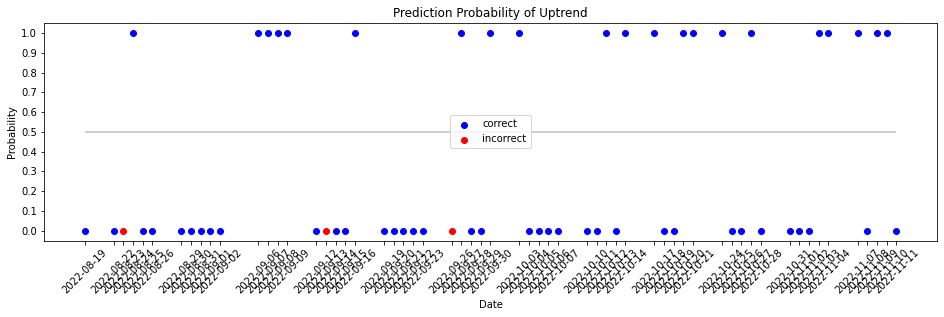

In [ ]:
plt.figure(figsize=(16,4)) 
plt.scatter(x=df_right.index, y=df_right['uptrend'], color='b', label="correct")
plt.scatter(x=df_wrong.index, y=df_wrong['uptrend'], color='r', label="incorrect")
plt.hlines(0.5, test_result.index.min(), test_result.index.max(), color='gray', alpha=0.5)
plt.xticks(test_result.index, rotation=45)
plt.yticks(np.arange(0,1.1, 0.1))
plt.title("Prediction Probability of Uptrend")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.legend(loc='center')
plt.show()

# Conclusiones

Los modelos de clasificacion nos sirven para comprender el comportamiento del mercado pero sin embargo no son eficientes a la hora de predecir el futuro, por esa razón intentamos modelar un modelo de auto regresion, como el modelo ARIMA
